In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# A2, Task 4
---------

In [6]:
def s(x_i, x_j, sigma):
    num = - np.sum( (x_i - x_j)**2 )
    denom = 2*sigma**2
    return np.exp(num/denom)


def c_ij(label_i, label_j):
    if label_i == label_j:
        return 1
    else:
        return 0


def tau(X, y):
    n = X.shape[0]
    sigma = np.std(X)
    tau = 0
    for i in range(n):
        num = 0
        denom = 0
        for j in range(n):
            if i != j:
                num += c_ij(y[i], y[j]) * s(X[i], X[j], sigma)
                denom += s(X[i], X[j], sigma)
        tau += (1/n) * (num/denom)
    return tau


def cluster(data, method):

    df = pd.DataFrame(data=np.zeros((4, 4)), columns=['K', 'SI', 'DB', r'$\tau$']).set_index('K')
    df.index = range(2, 6)
    # fig, ax = plt.subplots(4, 1, figsize=(7, 7));
    features = data[['X', 'Y']].values
    labels = data['class'].values

    for K in range(2, 6):
        
        if method == 'kmeans':
            clustering = KMeans(n_clusters=K).fit(features)
        if method == 'spectral':
            clustering = SpectralClustering(n_clusters=K, affinity='rbf').fit(features)
        pred = clustering.labels_

        SI = silhouette_score(features, pred)
        df.at[K, 'SI'] = np.round(SI, 2)

        DB = davies_bouldin_score(features, pred)
        df.at[K, 'DB'] = np.round(DB, 2)
        
        TAU = tau(features, pred)
        df.at[K, r'$\tau$'] = np.round(TAU, 2)

        # ax[K-2].scatter(data['X'], data['Y'], c=pred)
        # ax[K-2].set_title("K={}".format(K))

    # fig.tight_layout()
    
    return df

In [7]:
spirals = pd.read_csv('spirals.txt', sep=',')
spirals

,X,Y,class
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


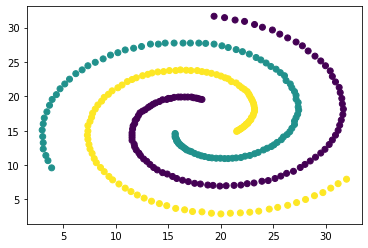

In [8]:
plt.scatter(spirals['X'], spirals['Y'], c=spirals['class'])

### i) K-means

In [9]:
cluster(spirals, 'kmeans')

,SI,DB,$\tau$
2,0.35,1.17,0.73
3,0.36,0.88,0.61
4,0.35,0.88,0.51
5,0.35,0.90,0.45


## ii)

In [10]:
cluster(spirals, 'spectral')

,SI,DB,$\tau$
2,0.03,6.31,0.58
3,0.00,5.88,0.35
4,-0.01,6.91,0.33
5,0.02,5.46,0.31
